## Superpixel and Stamp Index Examples

Nothing is actually computed in this notebook but it does show examples of the RGB Bayer array and how we index the colors and the pixel locations.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

from piaa import utils

%matplotlib inline

## RGB Superpixel

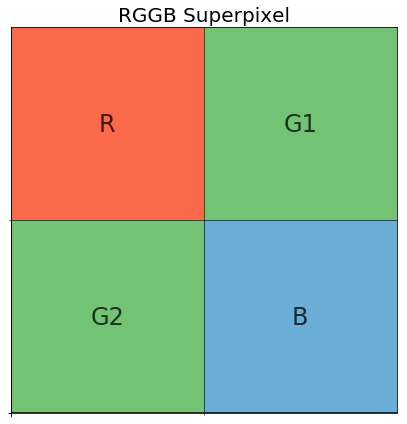

In [2]:
superpixel = np.array([[1, 1], [1, 1]])

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(9,6)

# major ticks every 2, minor ticks every 1
x_major_ticks = np.arange(-0.5, 1.5, 2)
x_minor_ticks = np.arange(-0.5, 1.5, 1)

y_major_ticks = np.arange(-0.5, 1.5, 2)
y_minor_ticks = np.arange(-0.5, 1.5, 1)

ax2.text(x=0.25, y=0.75, ha='center', va='center', s='R', fontsize=24, alpha=0.75, transform=ax2.transAxes)
ax2.text(x=0.75, y=0.75, ha='center', va='center', s='G1', fontsize=24, alpha=0.75, transform=ax2.transAxes)
ax2.text(x=0.25, y=0.25, ha='center', va='center', s='G2', fontsize=24, alpha=0.75, transform=ax2.transAxes)
ax2.text(x=0.75, y=0.25, ha='center', va='center', s='B', fontsize=24, alpha=0.75, transform=ax2.transAxes)

ax2.set_xticks(x_major_ticks)
ax2.set_xticks(x_minor_ticks, minor=True)
ax2.set_yticks(y_major_ticks)
ax2.set_yticks(y_minor_ticks, minor=True)

ax2.grid(which='major', color='k', lw=2, linestyle='-', alpha=0.75)
ax2.grid(which='minor', color='k', linestyle='-', alpha=0.75)

r_a_mask, g_a_mask, b_a_mask = utils.make_masks(superpixel)

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.imshow(np.ma.array(np.ones((2, 2)), mask=~r_a_mask), cmap='Reds', vmin=0, vmax=2., )
ax2.imshow(np.ma.array(np.ones((2, 2)), mask=~g_a_mask), cmap='Greens', vmin=0, vmax=2., )
ax2.imshow(np.ma.array(np.ones((2, 2)), mask=~b_a_mask), cmap='Blues', vmin=0, vmax=2., )
ax2.set_title("RGGB Superpixel", fontsize=20)

fig.tight_layout()
fig.savefig('superpixel.png', dpi=300)

## Stamp Index Scheme

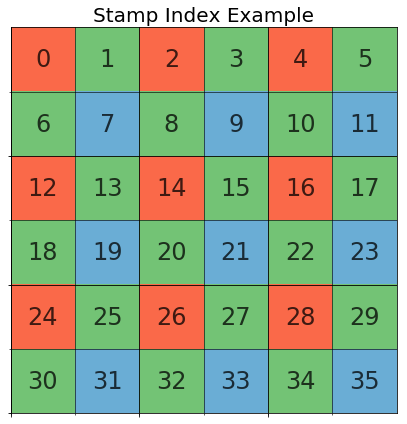

In [3]:
stamp = np.arange(36).reshape(6, 6)

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(9,6)

# major ticks every 2, minor ticks every 1
x_major_ticks = np.arange(-0.5, 5.5, 2)
x_minor_ticks = np.arange(-0.5, 5.5, 1)

y_major_ticks = np.arange(-0.5, 5.5, 2)
y_minor_ticks = np.arange(-0.5, 5.5, 1)

for i in range(6):
    for j in range(6):
        ax2.text(x=((i / 6) + (0.5 / 6)) , y=(((6 - j) / 6) - (0.5 / 6)), 
                 ha='center', va='center', s=str((j * 6) + i), fontsize=24, alpha=0.75, transform=ax2.transAxes)

        # ax2.text(x=0.75, y=0.75, ha='center', va='center', s='G1', fontsize=24, alpha=0.75, transform=ax2.transAxes)
# ax2.text(x=0.25, y=0.25, ha='center', va='center', s='G2', fontsize=24, alpha=0.75, transform=ax2.transAxes)
# ax2.text(x=0.75, y=0.25, ha='center', va='center', s='B', fontsize=24, alpha=0.75, transform=ax2.transAxes)

ax2.set_xticks(x_major_ticks)
ax2.set_xticks(x_minor_ticks, minor=True)
ax2.set_yticks(y_major_ticks)
ax2.set_yticks(y_minor_ticks, minor=True)

ax2.grid(which='major', color='k', linestyle='-', alpha=0.75)
ax2.grid(which='minor', color='k', linestyle='-', alpha=0.75)

r_a_mask, g_a_mask, b_a_mask = utils.make_masks(stamp)

ax2.set_xlim(-0.5, 5.5)
ax2.set_ylim(-0.5, 5.5)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.imshow(np.ma.array(np.ones((6, 6)), mask=~r_a_mask), cmap='Reds', vmin=0, vmax=2., )
ax2.imshow(np.ma.array(np.ones((6, 6)), mask=~g_a_mask), cmap='Greens', vmin=0, vmax=2., )
ax2.imshow(np.ma.array(np.ones((6, 6)), mask=~b_a_mask), cmap='Blues', vmin=0, vmax=2., )
ax2.set_title("Stamp Index Example", fontsize=20)

fig.tight_layout()
fig.savefig('stamp-index.png', dpi=300)